# Explore here

In [55]:
# Your code here
import pandas as pd


url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
df = pd.read_csv(url)


df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
df.shape

(1338, 7)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Duplicados 


In [58]:
duplicados = df.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")


duplicated_rows = df[duplicados]
print(duplicated_rows.head())

Número de filas duplicadas: 1
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [59]:
df = df.drop_duplicates()

In [60]:
valores_nulos = df.isnull().sum()


print(valores_nulos[valores_nulos > 0])

Series([], dtype: int64)


In [61]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

variables numericas age,bmi,children 
variables categoricas sex, smoker, region 

Variables Numericas 

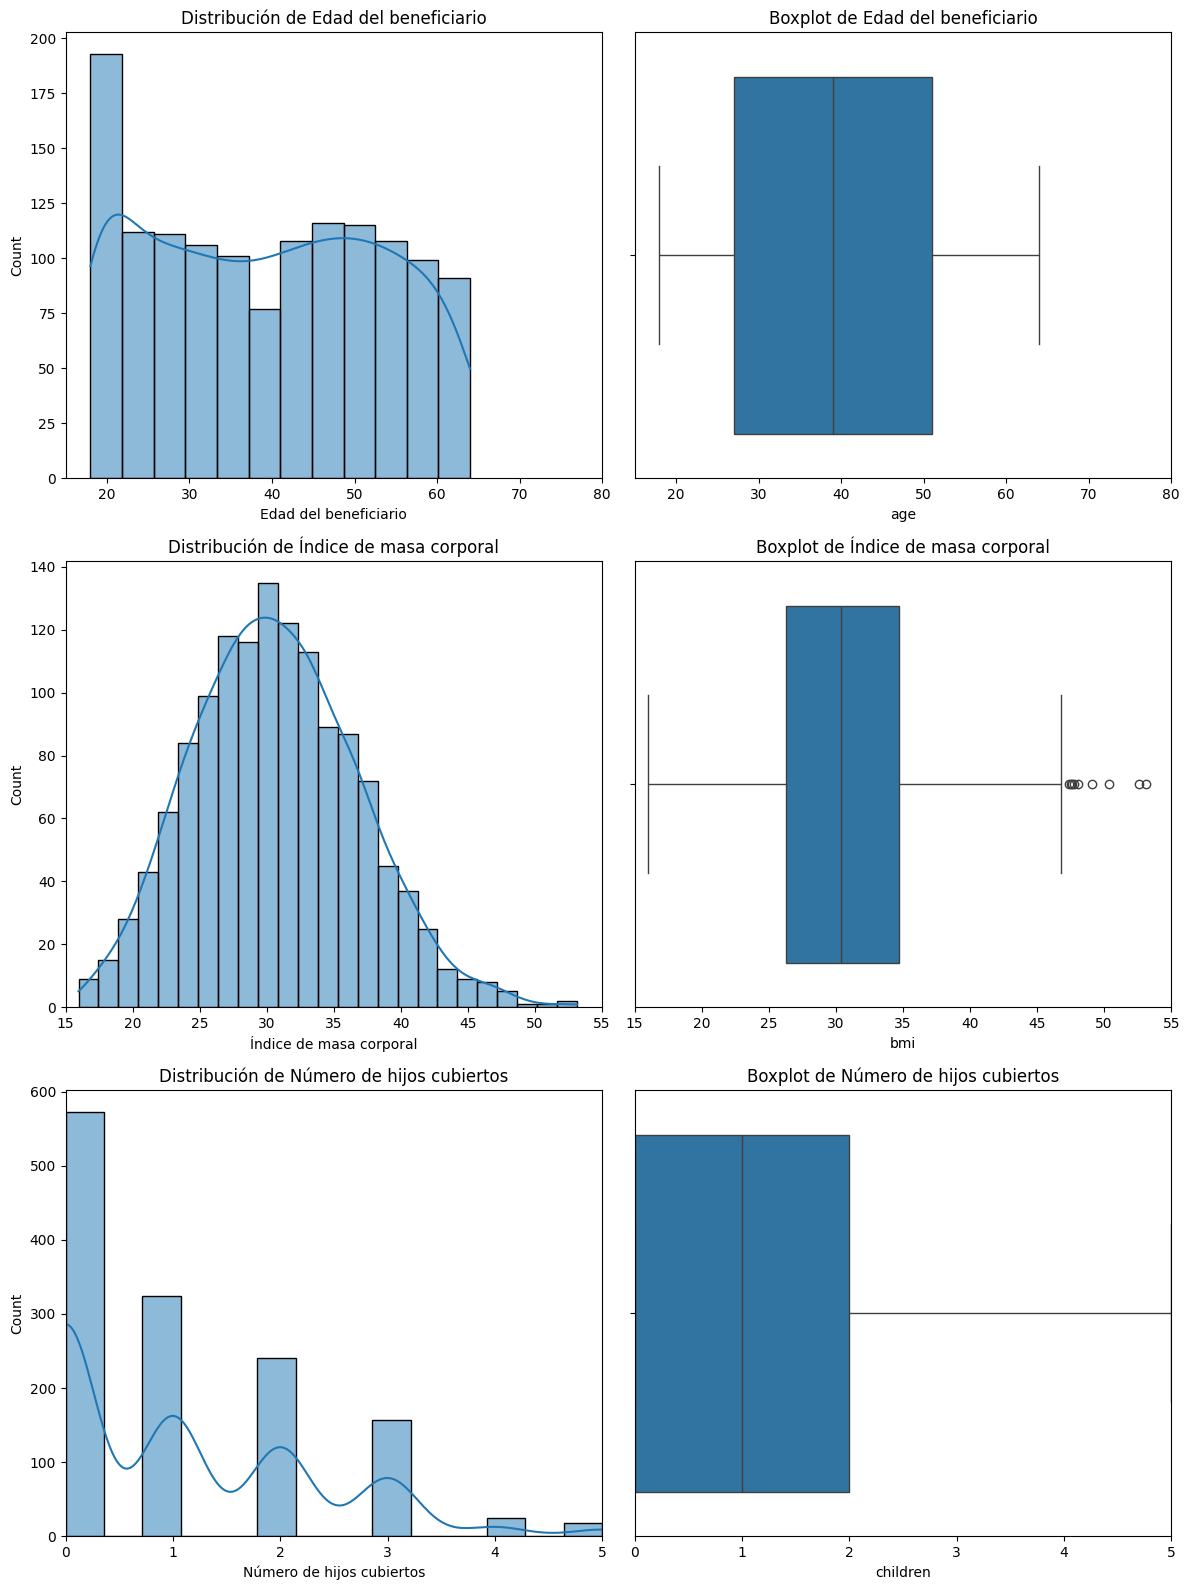

In [62]:
import matplotlib.pyplot as plt 
import seaborn as sns

numerical_columns = ['age', 'bmi', 'children']


column_names_es = {
    'age': 'Edad del beneficiario',
    'bmi': 'Índice de masa corporal',
    'children': 'Número de hijos cubiertos'
}


xlimits = {
    'age': (15, 80),
    'bmi': (15, 55),
    'children': (0, 5)
}


fig, axis = plt.subplots(3, 2, figsize=(12, 16), gridspec_kw={"height_ratios": [6, 6, 6]})

for i, column in enumerate(numerical_columns):
    sns.histplot(ax=axis[i, 0], data=df, x=column, kde=True)
    axis[i, 0].set_title(f"Distribución de {column_names_es[column]}")
    axis[i, 0].set_xlabel(column_names_es[column])
    axis[i, 0].set_xlim(xlimits[column])
    
    sns.boxplot(ax=axis[i, 1], data=df, x=column)
    axis[i, 1].set_title(f"Boxplot de {column_names_es[column]}")
    axis[i, 1].set_xlim(xlimits[column])

plt.tight_layout()
plt.show()


Tenemos una población mayoritaria de unos 20 años de edad, la cual cuenta con pocos niños cubiertos y con un índice de masa corporal entre unos 25 y 35 

variables categoricas 

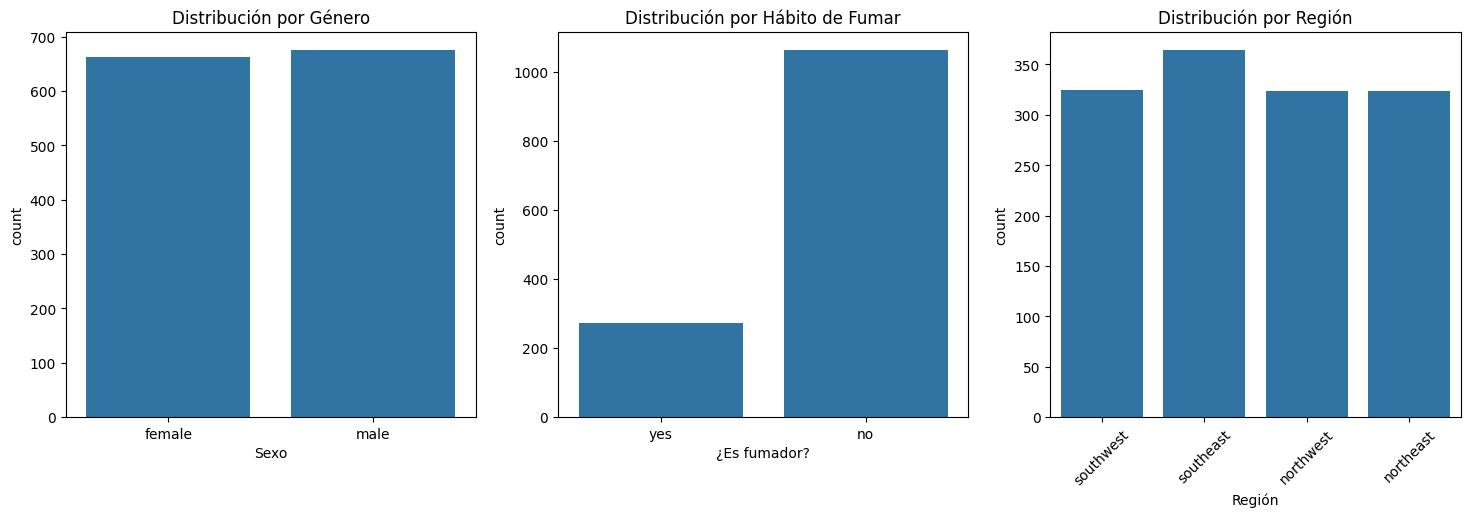

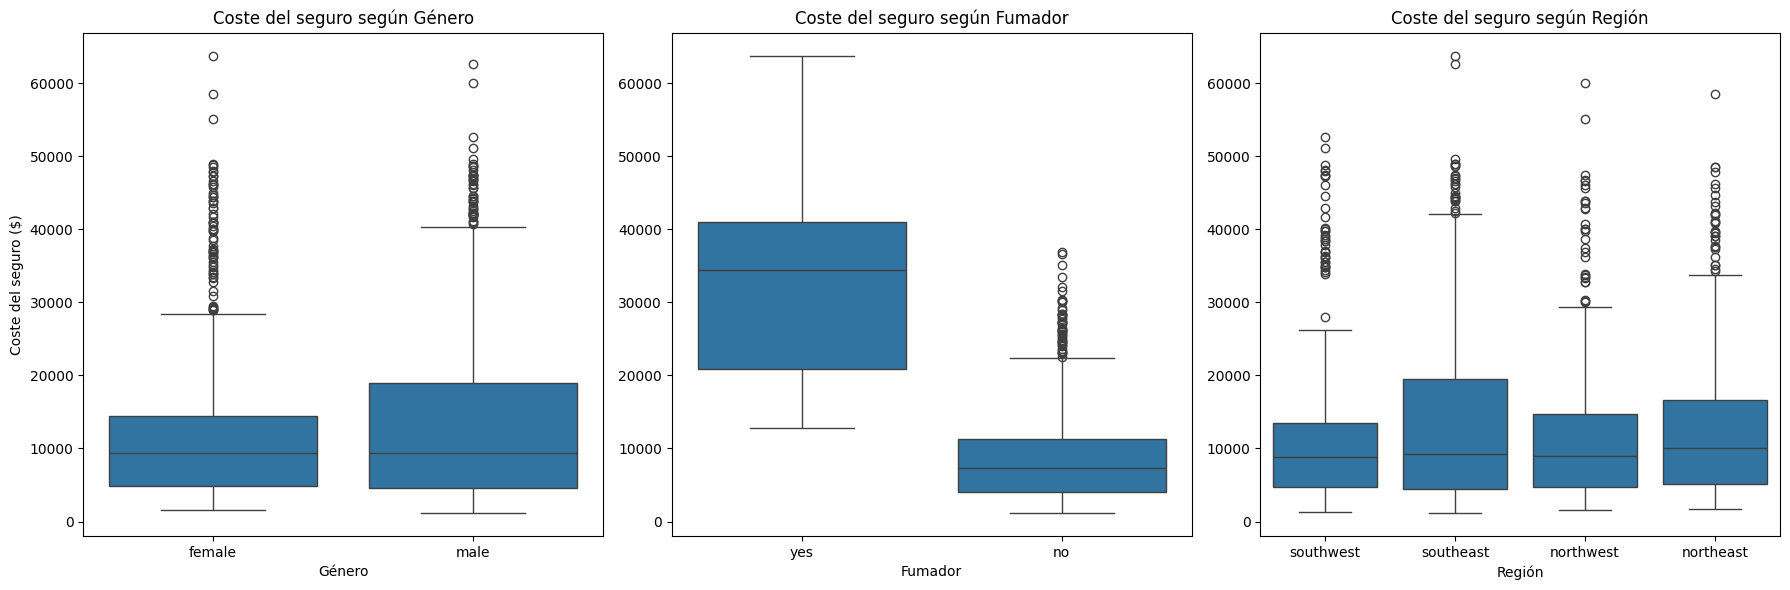

<Figure size 640x480 with 0 Axes>

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axis = plt.subplots(1, 3, figsize=(18, 5))


sns.countplot(ax=axis[0], data=df, x="sex")
axis[0].set_title("Distribución por Género")
axis[0].set_xlabel("Sexo")


sns.countplot(ax=axis[1], data=df, x="smoker")
axis[1].set_title("Distribución por Hábito de Fumar")
axis[1].set_xlabel("¿Es fumador?")


sns.countplot(ax=axis[2], data=df, x="region")
axis[2].set_title("Distribución por Región")
axis[2].set_xlabel("Región")
axis[2].tick_params(axis='x', rotation=45)
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
categorical_columns = ['sex', 'smoker', 'region']

column_names_es = {
    'sex': 'Género',
    'smoker': 'Fumador',
    'region': 'Región'
}
for i, column in enumerate(categorical_columns):
    sns.boxplot(ax=axis[i], data=df, x=column, y='charges')
    axis[i].set_title(f'Coste del seguro según {column_names_es[column]}')
    axis[i].set_xlabel(column_names_es[column])
    axis[i].set_ylabel('Coste del seguro ($)' if i == 0 else '')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


Se puede ver que la prima es mas cara para los fuamdores y para el genero masculino, parqa la region sureste es un poco mas elevado, tenemos una poblacion con pocos fumadores y la distribucion por sexo, estan equiparadas. 

Análisis categórico-categórico


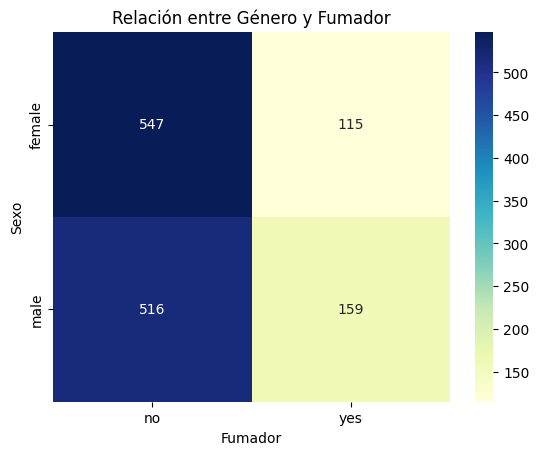

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


contingencia = pd.crosstab(df['sex'], df['smoker'])


sns.heatmap(contingencia, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Relación entre Género y Fumador')
plt.xlabel('Fumador')
plt.ylabel('Sexo')
plt.show()



pequeña tendencia de mas fumadores en el genero masculino 

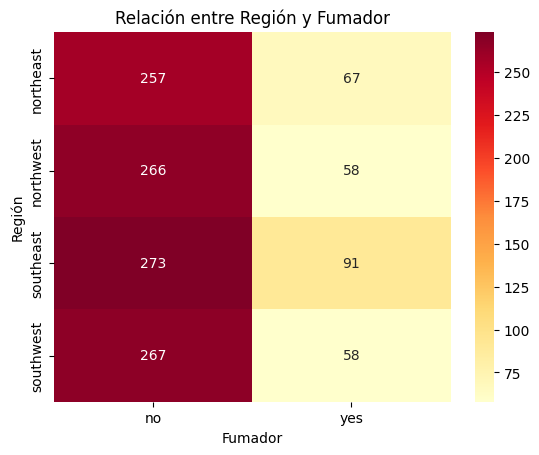

In [65]:
contingencia = pd.crosstab(df['region'], df['smoker'])
sns.heatmap(contingencia, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Relación entre Región y Fumador')
plt.xlabel('Fumador')
plt.ylabel('Región')
plt.show()


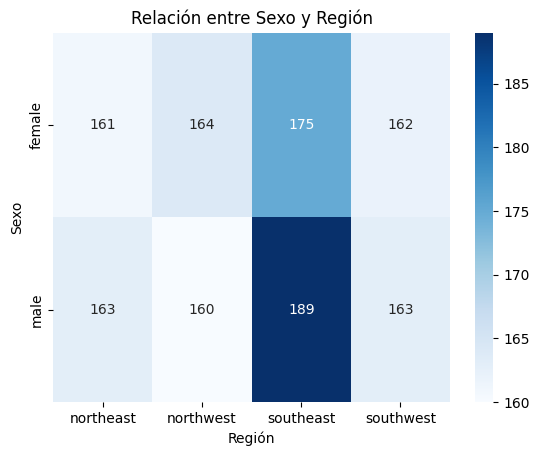

In [66]:
contingencia = pd.crosstab(df['sex'], df['region'])
sns.heatmap(contingencia, annot=True, cmap='Blues', fmt='d')
plt.title('Relación entre Sexo y Región')
plt.xlabel('Región')
plt.ylabel('Sexo')
plt.show()


Análisis numérico-categórico (completo)


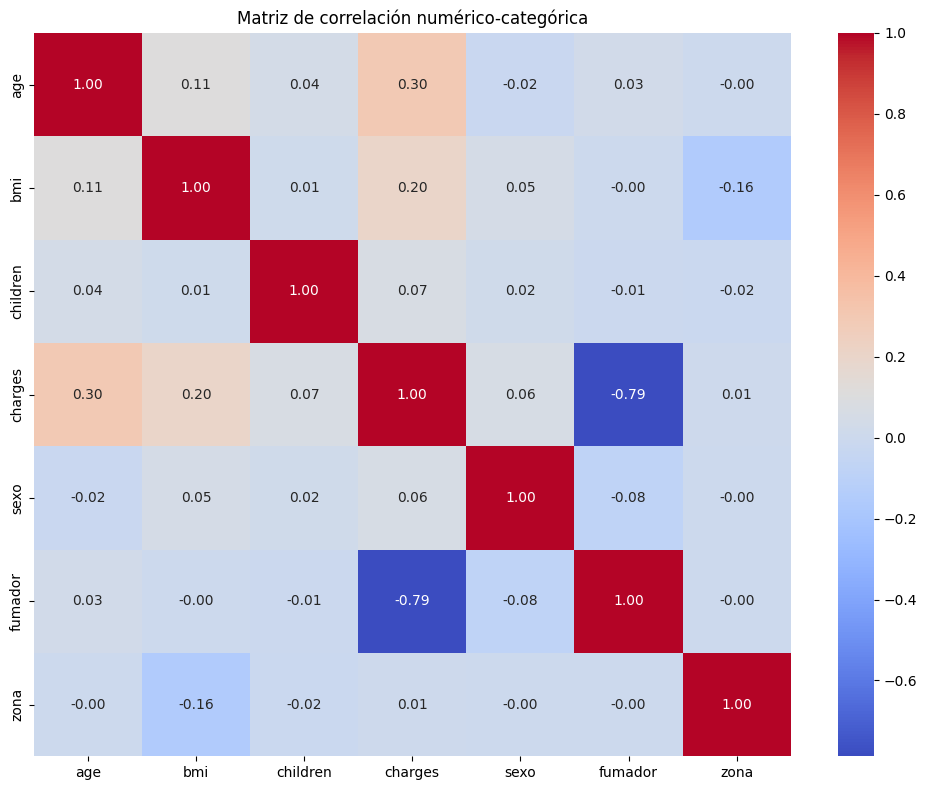

In [67]:
df["sexo"] = pd.factorize(df["sex"])[0]
df["fumador"] = pd.factorize(df["smoker"])[0]
df["zona"] = pd.factorize(df["region"])[0]

columnas_numericas = ["age", "bmi", "children", "charges"]

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[columnas_numericas + ["sexo", "fumador", "zona"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación numérico-categórica")
plt.tight_layout()
plt.show()


hay una furte relacion con la variable objetivo (Prima del seguro médico ) y la variable fumador, le sigue la edad y la variable de   indice de masa corporal

valores atipicos 

In [68]:
df.describe()

,age,bmi,children,charges,sexo,fumador,zona
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


outliers en age 

In [69]:
edad_estadistica = df['age'].describe()
edad_estadistica

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [70]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_age = df[(df["age"] < limite_inferior) | (df["age"] > limite_superior)]
print(f"Número de outliers en 'age': {len(outliers_age)}")


Número de outliers en 'age': 0


outliers en bmi 

In [71]:
bmi_estadistica = df['bmi'].describe()
bmi_estadistica

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [72]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_bmi = df[(df["bmi"] < limite_inferior) | (df["bmi"] > limite_superior)]
print(f"Outliers en 'bmi': {len(outliers_bmi)} casos")
print(f"Límites de bmi: {limite_inferior:.2f} a {limite_superior:.2f}")


Outliers en 'bmi': 9 casos
Límites de bmi: 13.67 a 47.32


este outliers puede ser que haya algunas personas con un poco de obesidad, no creo que se deban borrar.

outlires en charges

In [73]:
prima_estadistica = df['charges'].describe()
prima_estadistica

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [74]:
Q1 = df["charges"].quantile(0.25)
Q3 = df["charges"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_charges = df[(df["charges"] < limite_inferior) | (df["charges"] > limite_superior)]
print(f"Outliers en 'charges': {len(outliers_charges)} casos")
print(f"Límites: {limite_inferior:.2f} a {limite_superior:.2f}")


Outliers en 'charges': 139 casos
Límites: -13120.72 a 34524.78


In [75]:
print("Valor mínimo :", df["charges"].min())


Valor mínimo : 1121.8739


los outliers pueden ser de personas que por su estado de salud deben pagar más.

outliers de la variable children

In [76]:
hijos_estadistica = df['children'].describe()
hijos_estadistica

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [77]:
Q1 = df["children"].quantile(0.25)
Q3 = df["children"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_children = df[(df["children"] < limite_inferior) | (df["children"] > limite_superior)]
print(f"Outliers en 'children': {len(outliers_children)} casos")
print(f"Límites: {limite_inferior} a {limite_superior}")
print(df["children"].value_counts().sort_index())


Outliers en 'children': 0 casos
Límites: -3.0 a 5.0
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


no veo nada fuera de lo comun 

Valores faltanes 

In [78]:
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sexo        0
fumador     0
zona        0
dtype: int64


Escalado de funciones

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_to_scale = ['age', 'bmi', 'children']


df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df_scaled.head()


,age,sex,bmi,children,smoker,region,charges,sexo,fumador,zona
0,-1.440418,female,-0.453160,-0.909234,yes,southwest,16884.92400,0,0,0
1,-1.511647,male,0.509422,-0.079442,no,southeast,1725.55230,1,1,1
2,-0.799350,male,0.383155,1.580143,no,southeast,4449.46200,1,1,1
3,-0.443201,male,-1.305052,-0.909234,no,northwest,21984.47061,1,1,2
4,-0.514431,male,-0.292456,-0.909234,no,northwest,3866.85520,1,1,2


Codificación de Variables Categóricas

variable sex

In [80]:
df['sexo'] = df['sex'].map({'female': 0, 'male': 1})


variable fumador

In [81]:
df['fumador'] = df['smoker'].map({'no': 0, 'yes': 1})


variable region

In [82]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)


In [83]:
df = df.drop(['sex', 'smoker'], axis=1)


In [84]:

df['region_northwest'] = df['region_northwest'].astype(int)
df['region_southeast'] = df['region_southeast'].astype(int)
df['region_southwest'] = df['region_southwest'].astype(int)

print(df.head())





   age     bmi  children      charges  sexo  fumador  zona  region_northwest  \
0   19  27.900         0  16884.92400     0        1     0                 0   
1   18  33.770         1   1725.55230     1        0     1                 0   
2   28  33.000         3   4449.46200     1        0     1                 0   
3   33  22.705         0  21984.47061     1        0     2                 1   
4   32  28.880         0   3866.85520     1        0     2                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


selecion de Carasteristicas

In [ ]:

correlation_matrix = df.corr()

print(correlation_matrix['charges'].sort_values(ascending=False))


charges             1.000000
fumador             0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sexo                0.058044
zona                0.006547
region_northwest   -0.038695
region_southwest   -0.043637
Name: charges, dtype: float64


In [ ]:

selected_features = ['fumador', 'age', 'bmi', 'children', 'sexo']


df_selected = df[selected_features + ['charges']]  


print(df_selected.head())


   fumador  age     bmi  children  sexo      charges
0        1   19  27.900         0     0  16884.92400
1        0   18  33.770         1     1   1725.55230
2        0   28  33.000         3     1   4449.46200
3        0   33  22.705         0     1  21984.47061
4        0   32  28.880         0     1   3866.85520


entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split


X = df_selected.drop(columns=['charges'])  
y = df_selected['charges']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos de entrenamiento:", X_train.shape)
print("Datos de prueba:", X_test.shape)


Datos de entrenamiento: (1069, 5)
Datos de prueba: (268, 5)


Modelo

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred) 


print("Error cuadrático medio (MSE):", mse)
print("R^2:", r2)


Error cuadrático medio (MSE): 35901914.114619814
R^2: 0.8046218811772661


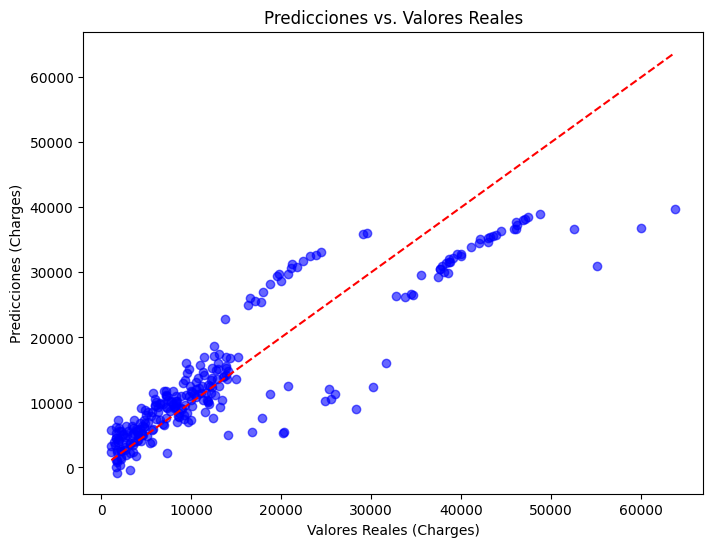

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales (Charges)')
plt.ylabel('Predicciones (Charges)')
plt.show()
